In [27]:
import pandas as pd
import numpy as np
import shap
import pybaobabdt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, \
    r2_score,confusion_matrix, f1_score, accuracy_score,recall_score, roc_curve,auc
from sklearn.linear_model import LinearRegression, Lasso,LassoCV,Ridge
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,AdaBoostRegressor
from xgboost import XGBClassifier,XGBRFRegressor

from sklearn.neighbors import  KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.neural_network import MLPClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [28]:
#前五个赛季的对抗训练，后一个赛季的对抗测试,最后一个赛季的球队数据为前五个赛季的平均值
df1 = pd.read_csv("data_rest/test_2023/match_train_H_rest.csv",index_col= 0,encoding='gbk')
df2= pd.read_csv("data_rest/test_2023/match_test_avg_H_rest.csv",index_col= 0,encoding='gbk')
df3= pd.read_csv("data_rest/test_2023/match_train_H_rest.csv",index_col= 0,encoding='gbk')
df4= pd.read_csv("data_rest/test_2023/match_test_avg_H_rest.csv",index_col= 0,encoding='gbk')

print(df1.shape,df2.shape,df3.shape,df4.shape)


(380, 38) (83, 38) (380, 38) (83, 38)


In [29]:
df1.res.value_counts()
df2.res.value_counts()

0    194
1    186
Name: res, dtype: int64

0    46
1    37
Name: res, dtype: int64

In [30]:
#不包含队名
xc_train=df3.iloc[:,5:-3]
xc_test=df4.iloc[:,5:-3]
yc_train=df1.res
yc_test=df2.res

xr_train=df3.iloc[:,5:-3]
xr_test=df4.iloc[:,5:-3]
yr_train=df1.PNV
yr_test=df2.PNV


In [31]:
for col in df1.columns:
    print(df1[col].dtype)

disc_cols = [col for col in df1.columns if df1[col].dtype != "float"]
cont_cols = [col for col in df1.columns if df1[col].dtype == "float"]
print(disc_cols)
print(cont_cols)

int64
object
object
int64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
float64
int64
float64
float64
int64
int64
object
['season', 'H_team', 'W_team', 'PTS', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'FBPS', 'PITP', 'BLKA', 'ORBC', 'DRBC', 'RBC', 'TCHS', 'PASS', 'DFGM', 'DFGA', 'SCREEN AST', 'DEFLECTIONS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED', 'DEF BOX OUTS', 'BOX OUTS', 'USG%', 'res', 'PNV', 'rest']
['3P%', '2P%', 'FT%', 'DFG%', 'TS%', 'PACE', 'PIE']


<Figure size 2500x1500 with 0 Axes>

..... 1 ......


<Axes: xlabel='season', ylabel='Count'>

Text(0.5, 0, 'season')

..... 2 ......


<Axes: xlabel='H_team', ylabel='Count'>

Text(0.5, 0, 'H_team')

..... 3 ......


<Axes: xlabel='W_team', ylabel='Count'>

Text(0.5, 0, 'W_team')

..... 4 ......


<Axes: xlabel='PTS', ylabel='Count'>

Text(0.5, 0, 'PTS')

..... 5 ......


<Axes: xlabel='OREB', ylabel='Count'>

Text(0.5, 0, 'OREB')

..... 6 ......


<Axes: xlabel='DREB', ylabel='Count'>

Text(0.5, 0, 'DREB')

..... 7 ......


<Axes: xlabel='AST', ylabel='Count'>

Text(0.5, 0, 'AST')

..... 8 ......


<Axes: xlabel='STL', ylabel='Count'>

Text(0.5, 0, 'STL')

..... 9 ......


<Axes: xlabel='BLK', ylabel='Count'>

Text(0.5, 0, 'BLK')

..... 10 ......


<Axes: xlabel='TO', ylabel='Count'>

Text(0.5, 0, 'TO')

..... 11 ......


<Axes: xlabel='PF', ylabel='Count'>

Text(0.5, 0, 'PF')

..... 12 ......


<Axes: xlabel='FBPS', ylabel='Count'>

Text(0.5, 0, 'FBPS')

..... 13 ......


<Axes: xlabel='PITP', ylabel='Count'>

Text(0.5, 0, 'PITP')

..... 14 ......


<Axes: xlabel='BLKA', ylabel='Count'>

Text(0.5, 0, 'BLKA')

..... 15 ......


<Axes: xlabel='ORBC', ylabel='Count'>

Text(0.5, 0, 'ORBC')

..... 16 ......


<Axes: xlabel='DRBC', ylabel='Count'>

Text(0.5, 0, 'DRBC')

..... 17 ......


<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 0, 'RBC')

..... 18 ......


<Axes: xlabel='TCHS', ylabel='Count'>

Text(0.5, 0, 'TCHS')

..... 19 ......


<Axes: xlabel='PASS', ylabel='Count'>

Text(0.5, 0, 'PASS')

..... 20 ......


<Axes: xlabel='DFGM', ylabel='Count'>

Text(0.5, 0, 'DFGM')

..... 21 ......


<Axes: xlabel='DFGA', ylabel='Count'>

Text(0.5, 0, 'DFGA')

..... 22 ......


<Axes: xlabel='SCREEN AST', ylabel='Count'>

Text(0.5, 0, 'SCREEN AST')

..... 23 ......


<Axes: xlabel='DEFLECTIONS', ylabel='Count'>

Text(0.5, 0, 'DEFLECTIONS')

..... 24 ......


<Axes: xlabel='OFF LOOSE BALLS RECOVERED', ylabel='Count'>

Text(0.5, 0, 'OFF LOOSE BALLS RECOVERED')

..... 25 ......


<Axes: xlabel='DEF LOOSE BALLS RECOVERED', ylabel='Count'>

Text(0.5, 0, 'DEF LOOSE BALLS RECOVERED')

..... 26 ......


<Axes: xlabel='DEF BOX OUTS', ylabel='Count'>

Text(0.5, 0, 'DEF BOX OUTS')

..... 27 ......


<Axes: xlabel='BOX OUTS', ylabel='Count'>

Text(0.5, 0, 'BOX OUTS')

..... 28 ......


<Axes: xlabel='USG%', ylabel='Count'>

Text(0.5, 0, 'USG%')

..... 29 ......


<Axes: xlabel='res', ylabel='Count'>

Text(0.5, 0, 'res')

..... 30 ......


<Axes: xlabel='PNV', ylabel='Count'>

Text(0.5, 0, 'PNV')

..... 31 ......


<Axes: xlabel='rest', ylabel='Count'>

Text(0.5, 0, 'rest')

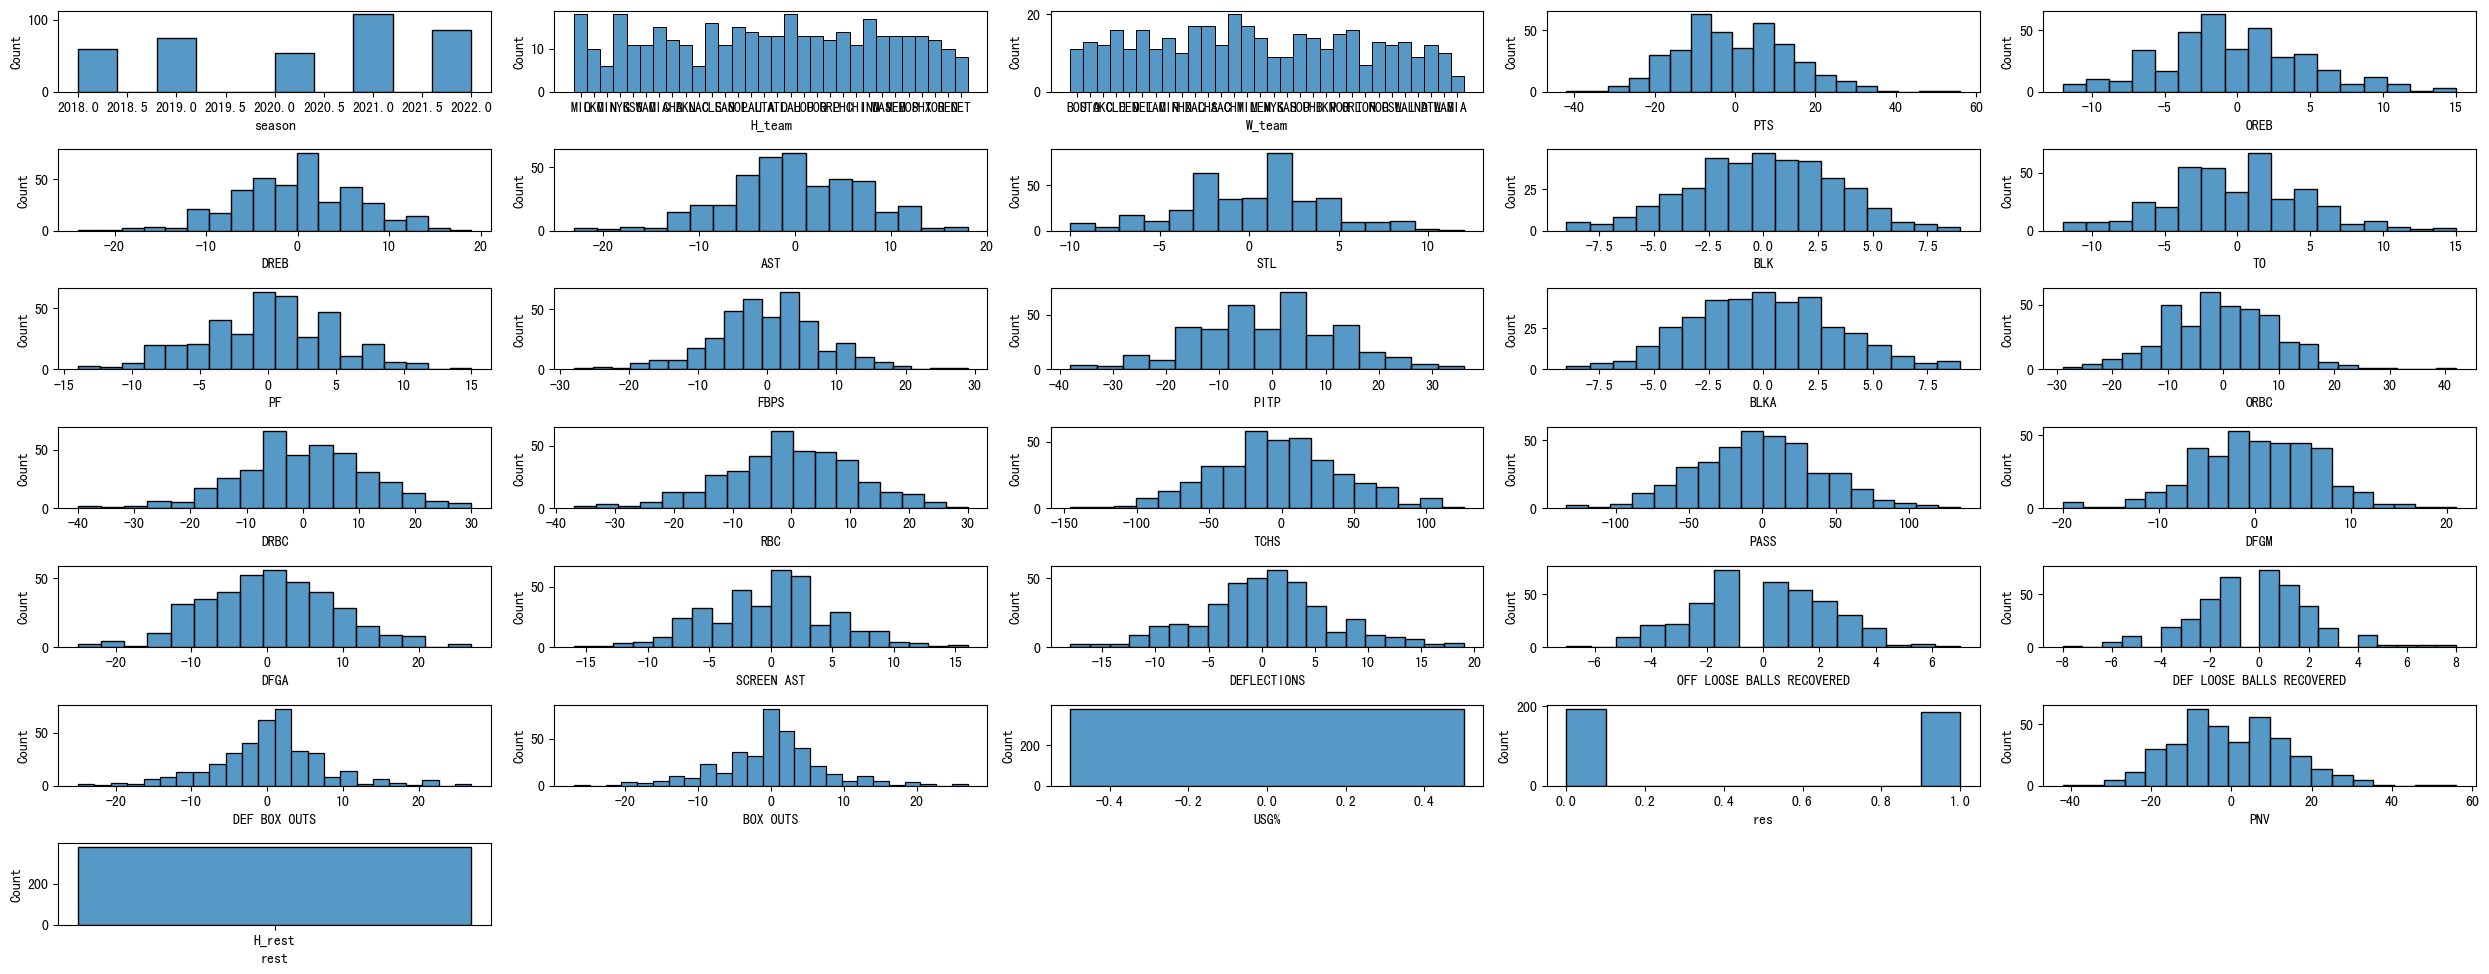

In [32]:
#查看离散型变量的分布图
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (25, 15))
sub_plotnumber = 1
for col in disc_cols:
    print('.....',sub_plotnumber,'......')
    ax = plt.subplot(11, 5, sub_plotnumber)  # 1行2列的画布；plotnumber表示子图位置
    sns.histplot(df1[col])  # 绘图
    plt.xlabel(col)  # x轴标签       
    sub_plotnumber += 1  # 自加1
plt.tight_layout()
plt.show()

<Figure size 2500x1500 with 0 Axes>

<Axes: xlabel='FT%', ylabel='Density'>

Text(0.5, 0, 'FT%')

<Axes: xlabel='DFG%', ylabel='Density'>

Text(0.5, 0, 'DFG%')

<Axes: xlabel='TS%', ylabel='Density'>

Text(0.5, 0, 'TS%')

<Axes: xlabel='PACE', ylabel='Density'>

Text(0.5, 0, 'PACE')

<Axes: xlabel='PIE', ylabel='Density'>

Text(0.5, 0, 'PIE')

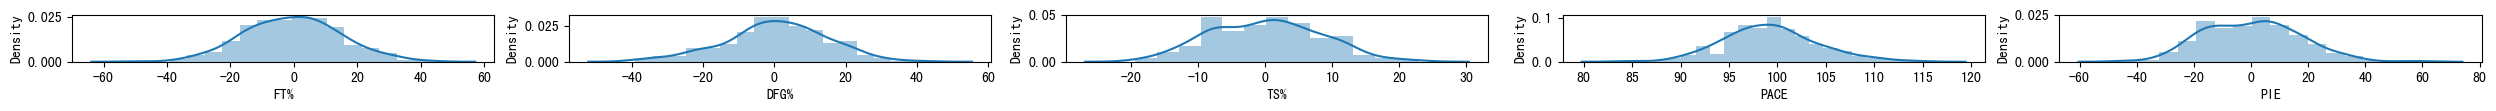

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize = (25, 15))
sub_plotnumber = 1
for col in cont_cols[2:]:
    ax = plt.subplot(15, 5, sub_plotnumber)  # 7行5列的画布；plotnumber表示子图位置
    sns.distplot(df1[col].astype("float"))  # 绘图
    plt.xlabel(col)  # x轴标签       
    sub_plotnumber += 1  # 自加1
plt.tight_layout()
plt.show()


In [34]:
classifier_res = pd.DataFrame(columns=["Desicion_tree","Naive_bayes","Logistic_regression"\
    ,"K_nearest_neighbors","SVC","MLP","XGB","lgb","RF","AdaBoost"],index=["acc","f1score"])
regression_res = pd.DataFrame(columns=["Linear_regression","Lasso","Ridge"\
    ,"K_nearest_neighbors","SVR","Desicion_tree","XGB","lgb","RF","AdaBoost"],index=[])
def run_regression_model(model,name):
    model.fit(xr_train, yr_train)
    y_pre = model.predict(xr_test)
    
    y_pre_c=np.where(y_pre > 0, 1, 0)

    print(name+"分类指标为：")
    acc = accuracy_score(yc_test, y_pre_c)
    f1score = f1_score(yc_test, y_pre_c)
    recall = recall_score(yc_test, y_pre_c)
    tn, fp, fn, tp = confusion_matrix(yc_test, y_pre_c).ravel()
    specificity = tn / (tn + fp)
    # 计算ROC曲线
    fpr, tpr, thresholds = roc_curve(yc_test, y_pre_c)
    # 计算AUC
    roc_auc = auc(fpr, tpr)
    # 绘制ROC曲线
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('AUC:', roc_auc)
    
    
    
    regression_res.loc["acc",name] = acc
    regression_res.loc["f1score", name] = f1score
    regression_res.loc["recall", name] = recall
    regression_res.loc["specificity", name] = specificity
    regression_res.loc["roc_auc", name] = roc_auc
    
    
    print(name+"分类指标为：")
    print(f"混淆矩阵为：\n{confusion_matrix(yc_test, y_pre_c)}")
    print(f"准确率为：{acc}")
    print(f"f1_score为：{f1score}")
    print(f"recall为：{recall}")
    print(f"specificity为：{specificity}")
    print(f"roc_auc为：{roc_auc}")
    
    #print(name+"回归指标为：")
    '''mse = mean_squared_error(yr_test, y_pre)
    mape = mean_absolute_percentage_error(yr_test, y_pre)
    r2 = r2_score(yr_test, y_pre)
    regression_res.loc["mse",name] = mse
    regression_res.loc["mape",name] = mape
    regression_res.loc["r2score",name] = r2
    print(f"MSE为：{mse}")
    print(f"MAPE为：{mape}")
    print(f"r2_score为：{r2}")'''

def run_classifier_model(model,name):
    model.fit(xc_train, yc_train)
    yc_pre = model.predict(xc_test)
    
    acc = accuracy_score(yc_test, yc_pre)
    f1score = f1_score(yc_test, yc_pre)
    recall = recall_score(yc_test, yc_pre)
    tn, fp, fn, tp = confusion_matrix(yc_test, yc_pre).ravel()
    specificity = tn / (tn + fp)
    # 计算ROC曲线
    fpr, tpr, thresholds = roc_curve(yc_test, yc_pre)
    # 计算AUC
    roc_auc = auc(fpr, tpr)
    # 绘制ROC曲线
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('AUC:', roc_auc)
    
    classifier_res.loc["acc",name] = acc
    classifier_res.loc["f1score", name] = f1score
    classifier_res.loc["recall", name] = recall
    classifier_res.loc["specificity", name] = specificity
    classifier_res.loc["roc_auc", name] = roc_auc
    
    print(name+"分类指标为：")
    print(f"混淆矩阵为：\n{confusion_matrix(yc_test, yc_pre)}")
    print(f"准确率为：{acc}")
    print(f"f1_score为：{f1score}")
    print(f"recall为：{recall}")
    print(f"specificity为：{specificity}")
    print(f"roc_auc为：{roc_auc}")
    
    

二分类：\
经典算法：决策树、NB、逻辑回归、K近邻、MLP、SVC\
集成算法：GBDT、XGB、RF、AdaBoost、lightGBM\
回归：\
经典算法：LR、lasso、ridge、K近邻、SVR、决策树\
集成算法：GBDT、XGB、RF、AdaBoost、lightGBM

## 二分类_经典算法

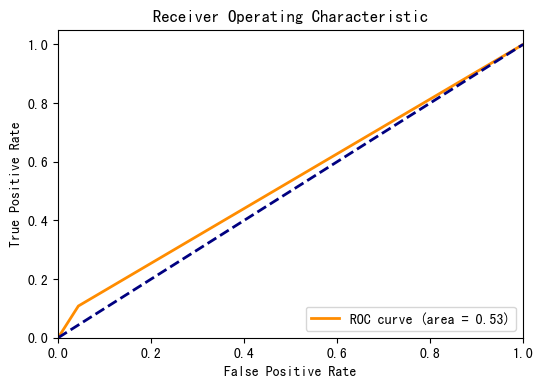

AUC: 0.5323149236192715
Desicion_tree分类指标为：
混淆矩阵为：
[[44  2]
 [33  4]]
准确率为：0.5783132530120482
f1_score为：0.18604651162790697
recall为：0.10810810810810811
specificity为：0.9565217391304348
roc_auc为：0.5323149236192715


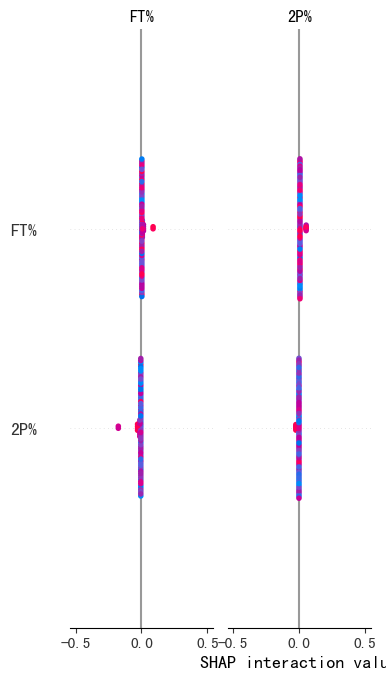

'shap.initjs()\nitem=10\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'

In [35]:

DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
run_classifier_model(DT,"Desicion_tree")

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(xc_test)

shap.summary_plot(shap_values,xc_test)

'''shap.initjs()
item=10
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'''

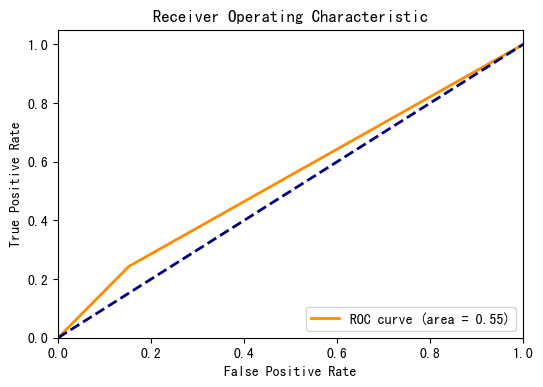

AUC: 0.5455346650998825
Naive_bayes分类指标为：
混淆矩阵为：
[[39  7]
 [28  9]]
准确率为：0.5783132530120482
f1_score为：0.33962264150943394
recall为：0.24324324324324326
specificity为：0.8478260869565217
roc_auc为：0.5455346650998825


'explainer = shap.KernelExplainer(GNB.predict,xc_train)\nshap_values = explainer.shap_values(xc_test)\n\nitem=520\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'

In [36]:
GNB = GaussianNB()
run_classifier_model(GNB,"Naive_bayes")

'''explainer = shap.KernelExplainer(GNB.predict,xc_train)
shap_values = explainer.shap_values(xc_test)

item=520
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'''

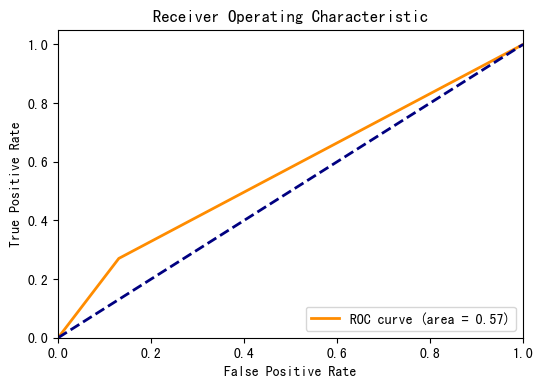

AUC: 0.5699177438307872
K_nearest_neighbors分类指标为：
混淆矩阵为：
[[40  6]
 [27 10]]
准确率为：0.6024096385542169
f1_score为：0.37735849056603776
recall为：0.2702702702702703
specificity为：0.8695652173913043
roc_auc为：0.5699177438307872


'explainer = shap.KernelExplainer(KN.predict,xc_train)\nshap_values = explainer.shap_values(xc_test)\n\nitem=520\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'

In [37]:
KN = KNeighborsClassifier(n_neighbors=30)
run_classifier_model(KN,"K_nearest_neighbors")

'''explainer = shap.KernelExplainer(KN.predict,xc_train)
shap_values = explainer.shap_values(xc_test)

item=520
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'''

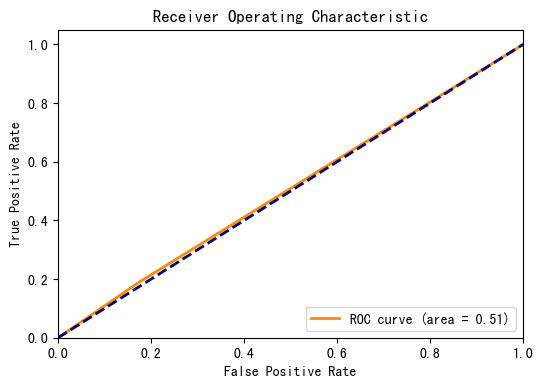

AUC: 0.5076380728554641
Logistic_regression分类指标为：
混淆矩阵为：
[[38  8]
 [30  7]]
准确率为：0.5421686746987951
f1_score为：0.2692307692307692
recall为：0.1891891891891892
specificity为：0.8260869565217391
roc_auc为：0.5076380728554641


'explainer = shap.LinearExplainer(LGR)\nshap_values = explainer.shap_values(xc_test)\n\nshap.initjs()\nitem=520\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'

In [38]:
LGR = LogisticRegression(max_iter=2000,C=1,penalty="l2")
run_classifier_model(LGR,"Logistic_regression")

'''explainer = shap.LinearExplainer(LGR)
shap_values = explainer.shap_values(xc_test)

shap.initjs()
item=520
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'''

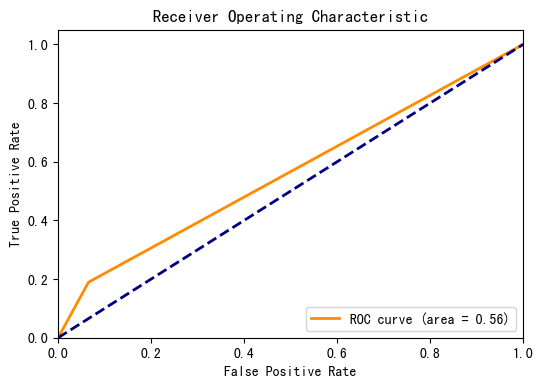

AUC: 0.5619858989424208
MLP分类指标为：
混淆矩阵为：
[[43  3]
 [30  7]]
准确率为：0.6024096385542169
f1_score为：0.2978723404255319
recall为：0.1891891891891892
specificity为：0.9347826086956522
roc_auc为：0.5619858989424208


'explainer = shap.GradientExplainer(MLP,xc_train)\nshap_values = explainer.shap_values(xc_test)\n\nitem=520\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'

In [39]:
MLP = MLPClassifier(activation="logistic",max_iter=2000,hidden_layer_sizes=50,random_state=1)
run_classifier_model(MLP,"MLP")


'''explainer = shap.GradientExplainer(MLP,xc_train)
shap_values = explainer.shap_values(xc_test)

item=520
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:])'''

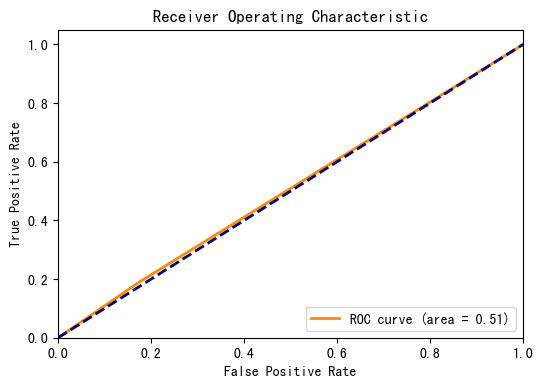

AUC: 0.5076380728554641
SVC分类指标为：
混淆矩阵为：
[[38  8]
 [30  7]]
准确率为：0.5421686746987951
f1_score为：0.2692307692307692
recall为：0.1891891891891892
specificity为：0.8260869565217391
roc_auc为：0.5076380728554641


In [40]:
SVC = SVC(C=1,kernel="linear")
run_classifier_model(SVC,"SVC")

#KernelExplainer

## 二分类_集成算法

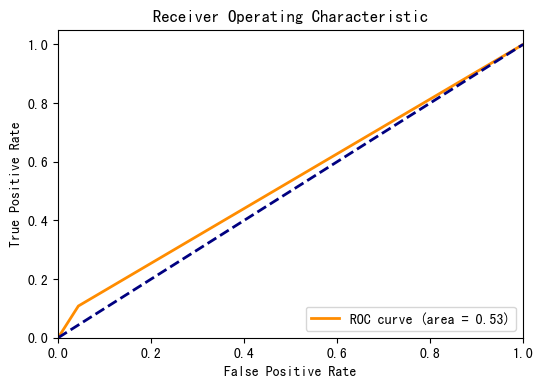

AUC: 0.5323149236192715
XGB分类指标为：
混淆矩阵为：
[[44  2]
 [33  4]]
准确率为：0.5783132530120482
f1_score为：0.18604651162790697
recall为：0.10810810810810811
specificity为：0.9565217391304348
roc_auc为：0.5323149236192715


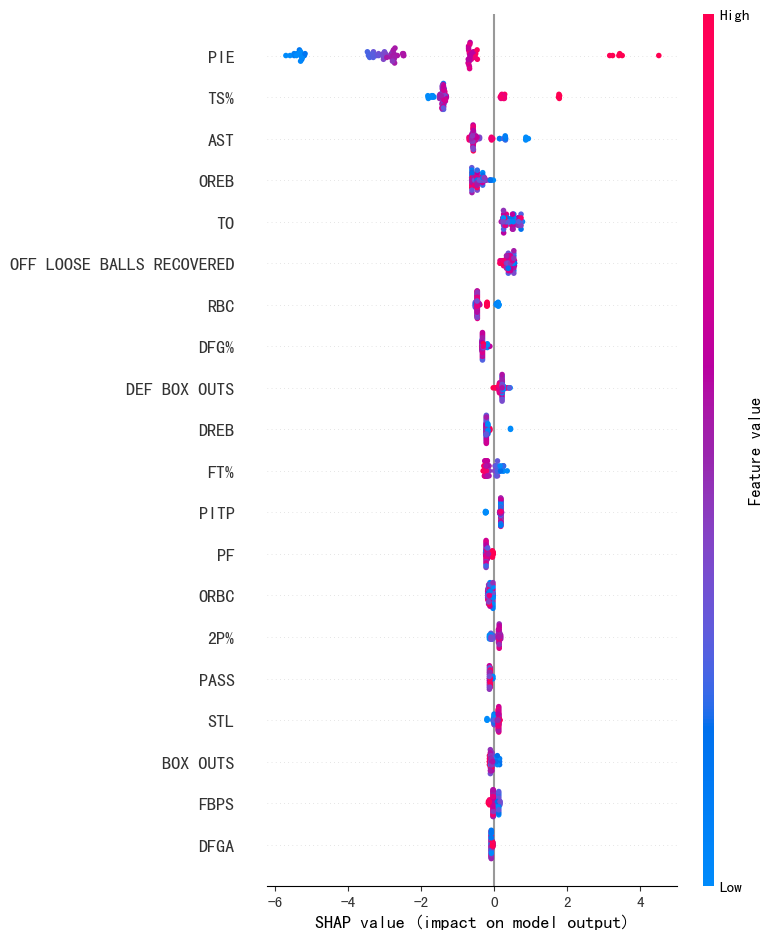

'shap.initjs()\nitem=10\nshap_values_instance = shap_values[item,:]\nshap.plots.force(explainer.expected_value, shap_values_instance, xc_test.iloc[item,:])'

In [41]:
XGBC = XGBClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 3)
run_classifier_model(XGBC,"XGB")

explainer = shap.TreeExplainer(XGBC)
shap_values = explainer.shap_values(xc_test)
shap.summary_plot(shap_values,xc_test)
'''shap.initjs()
item=10
shap_values_instance = shap_values[item,:]
shap.plots.force(explainer.expected_value, shap_values_instance, xc_test.iloc[item,:])'''

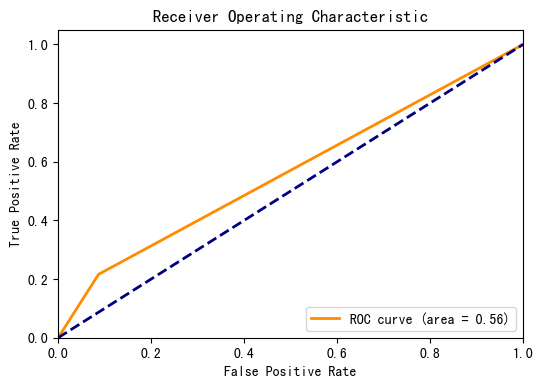

AUC: 0.5646298472385429
RF分类指标为：
混淆矩阵为：
[[42  4]
 [29  8]]
准确率为：0.6024096385542169
f1_score为：0.32653061224489793
recall为：0.21621621621621623
specificity为：0.9130434782608695
roc_auc为：0.5646298472385429


'\nexplainer = shap.TreeExplainer(RFC)\nshap_values = explainer.shap_values(xc_test)\nprint(explainer.expected_value)\nitem=520\nshap_values_instance = shap_values[item,:,0]\nshap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:,0])'

In [42]:
RFC = RandomForestClassifier(n_estimators = 200, max_depth = 5)
run_classifier_model(RFC,"RF")
'''
explainer = shap.TreeExplainer(RFC)
shap_values = explainer.shap_values(xc_test)
print(explainer.expected_value)
item=520
shap_values_instance = shap_values[item,:,0]
shap.plots.force(explainer.expected_value[0], shap_values_instance, xc_test.iloc[item,:,0])'''

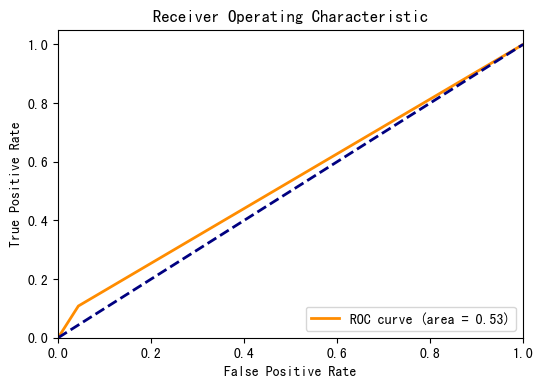

AUC: 0.5323149236192715
AdaBoost分类指标为：
混淆矩阵为：
[[44  2]
 [33  4]]
准确率为：0.5783132530120482
f1_score为：0.18604651162790697
recall为：0.10810810810810811
specificity为：0.9565217391304348
roc_auc为：0.5323149236192715


In [43]:
ADAC = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1)
run_classifier_model(ADAC,"AdaBoost")

In [44]:
'''import lightgbm as lgb
train_data = lgb.Dataset(xc_train, label=yc_train)
test_data = lgb.Dataset(xc_test,label=yc_test, reference=train_data)
params = {
    'objective': 'binary',  # 二分类任务
    'metric': 'binary_logloss',  # 使用对数损失作为评估指标
    'boosting_type': 'gbdt',  # GBDT boosting 类型
    'learning_rate': 0.1,  # 学习率
    'num_leaves': 40,  # 叶子节点数
    "n_estimators": 300,
    "max_depth": 5, 
    'verbose': -1  # 控制输出信息的详细程度
}
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
y_pred = bst.predict(xc_test)
y_pred_binary = [1 if val > 0.5 else 0 for val in y_pred]
acc = accuracy_score(yc_test, y_pred_binary)
f1score = f1_score(yc_test, y_pred_binary)
classifier_res.loc["acc","lgb"] = acc
classifier_res.loc["f1score", "lgb"] = f1score
print(f"准确率为：{acc}")
print(f"f1_score为：{f1score}")'''

'import lightgbm as lgb\ntrain_data = lgb.Dataset(xc_train, label=yc_train)\ntest_data = lgb.Dataset(xc_test,label=yc_test, reference=train_data)\nparams = {\n    \'objective\': \'binary\',  # 二分类任务\n    \'metric\': \'binary_logloss\',  # 使用对数损失作为评估指标\n    \'boosting_type\': \'gbdt\',  # GBDT boosting 类型\n    \'learning_rate\': 0.1,  # 学习率\n    \'num_leaves\': 40,  # 叶子节点数\n    "n_estimators": 300,\n    "max_depth": 5, \n    \'verbose\': -1  # 控制输出信息的详细程度\n}\nnum_round = 100\nbst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)\ny_pred = bst.predict(xc_test)\ny_pred_binary = [1 if val > 0.5 else 0 for val in y_pred]\nacc = accuracy_score(yc_test, y_pred_binary)\nf1score = f1_score(yc_test, y_pred_binary)\nclassifier_res.loc["acc","lgb"] = acc\nclassifier_res.loc["f1score", "lgb"] = f1score\nprint(f"准确率为：{acc}")\nprint(f"f1_score为：{f1score}")'

                          acc   f1score    recall specificity   roc_auc
Desicion_tree        0.578313  0.186047  0.108108  0.956522    0.532315
Naive_bayes          0.578313  0.339623  0.243243  0.847826    0.545535
Logistic_regression  0.542169  0.269231  0.189189  0.826087    0.507638
K_nearest_neighbors  0.60241   0.377358  0.27027   0.869565    0.569918
SVC                  0.542169  0.269231  0.189189  0.826087    0.507638
MLP                  0.60241   0.297872  0.189189  0.934783    0.561986
XGB                  0.578313  0.186047  0.108108  0.956522    0.532315
RF                   0.60241   0.326531  0.216216  0.913043    0.56463 
AdaBoost             0.578313  0.186047  0.108108  0.956522    0.532315


[Text(0.0, 0, 'acc'),
 Text(1.2566370614359172, 0, 'f1score'),
 Text(2.5132741228718345, 0, 'recall'),
 Text(3.7699111843077517, 0, 'specificity'),
 Text(5.026548245743669, 0, 'roc_auc')]

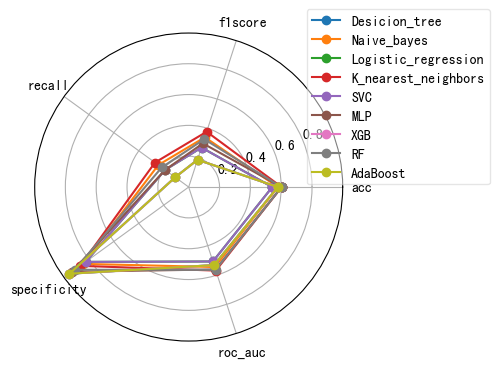

<Figure size 600x400 with 0 Axes>

[Text(0.0, 0, 'Desicion_tree'),
 Text(0.6981317007977318, 0, 'Naive_bayes'),
 Text(1.3962634015954636, 0, 'Logistic_regression'),
 Text(2.0943951023931953, 0, 'K_nearest_neighbors'),
 Text(2.792526803190927, 0, 'SVC'),
 Text(3.490658503988659, 0, 'MLP'),
 Text(4.1887902047863905, 0, 'XGB'),
 Text(4.886921905584122, 0, 'RF'),
 Text(5.585053606381854, 0, 'AdaBoost')]

<Figure size 600x400 with 0 Axes>

In [45]:
if 'acc' in classifier_res.index :
    classifier_res=classifier_res.T
classifier_res=classifier_res.dropna()
classifier_res_T=classifier_res.T
print(classifier_res)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2 * np.pi, len(classifier_res.columns), endpoint=False).tolist()
angles += angles[:1]

for i, row in classifier_res.iterrows():
    values = row.values.tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o',label=f'{i}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(classifier_res.columns)

ax.yaxis.grid(True)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1), framealpha=0.5)

plt.show()


plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2 * np.pi, len(classifier_res_T.columns), endpoint=False).tolist()
angles += angles[:1]

for i, row in classifier_res_T.iterrows():
    values = row.values.tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o',label=f'{i}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(classifier_res_T.columns)

ax.yaxis.grid(True)

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), framealpha=0.5)

plt.show()

## 回归_经典算法

Linear_regression分类指标为：


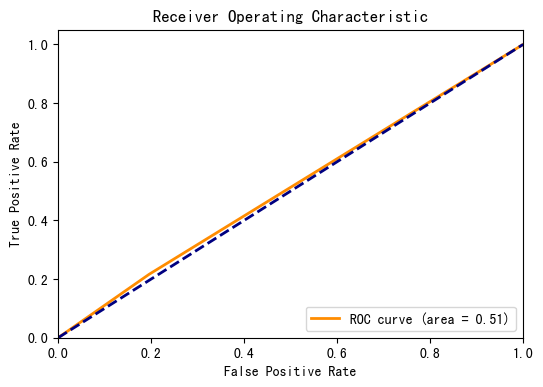

AUC: 0.5102820211515864
Linear_regression分类指标为：
混淆矩阵为：
[[37  9]
 [29  8]]
准确率为：0.5421686746987951
f1_score为：0.2962962962962963
recall为：0.21621621621621623
specificity为：0.8043478260869565
roc_auc为：0.5102820211515864


In [46]:
LNR = LinearRegression()
run_regression_model(LNR,"Linear_regression")

Lasso分类指标为：


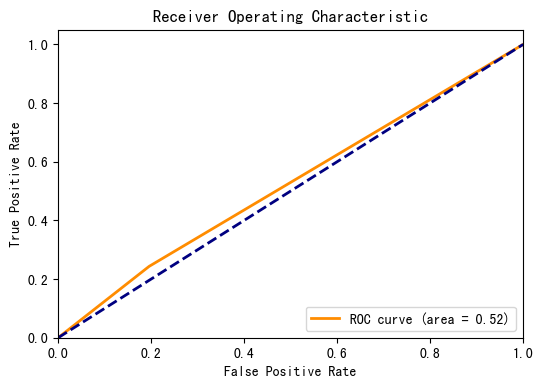

AUC: 0.5237955346650999
Lasso分类指标为：
混淆矩阵为：
[[37  9]
 [28  9]]
准确率为：0.5542168674698795
f1_score为：0.32727272727272727
recall为：0.24324324324324326
specificity为：0.8043478260869565
roc_auc为：0.5237955346650999


In [47]:
LAS = Lasso(alpha=0.05)
run_regression_model(LAS,"Lasso")

Ridge分类指标为：


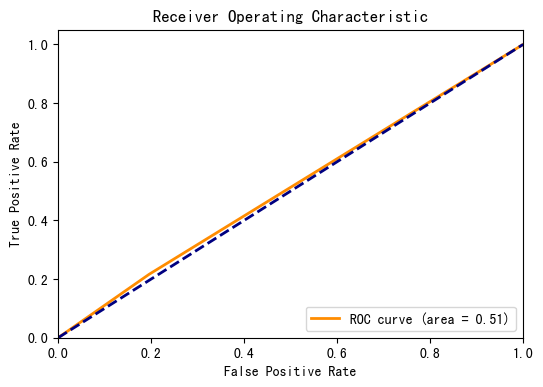

AUC: 0.5102820211515864
Ridge分类指标为：
混淆矩阵为：
[[37  9]
 [29  8]]
准确率为：0.5421686746987951
f1_score为：0.2962962962962963
recall为：0.21621621621621623
specificity为：0.8043478260869565
roc_auc为：0.5102820211515864


In [48]:
RIG = Ridge(alpha=0.1)
run_regression_model(RIG,"Ridge")

SVR分类指标为：


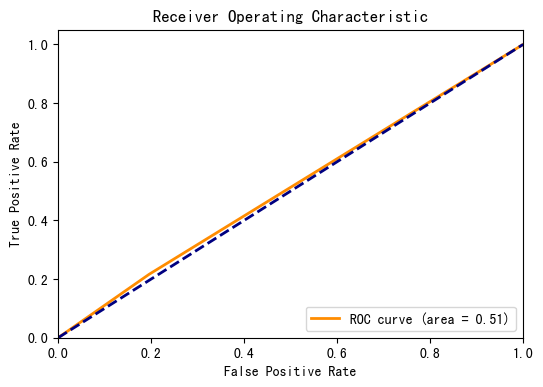

AUC: 0.5102820211515864
SVR分类指标为：
混淆矩阵为：
[[37  9]
 [29  8]]
准确率为：0.5421686746987951
f1_score为：0.2962962962962963
recall为：0.21621621621621623
specificity为：0.8043478260869565
roc_auc为：0.5102820211515864


In [49]:
svr = SVR(kernel="linear",C = 1)
run_regression_model(svr,"SVR")

K_nearest_neighbors分类指标为：


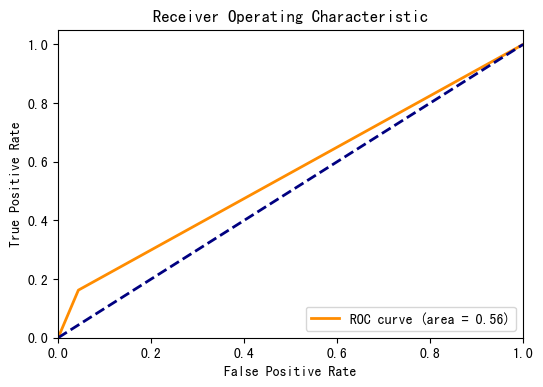

AUC: 0.5593419506462985
K_nearest_neighbors分类指标为：
混淆矩阵为：
[[44  2]
 [31  6]]
准确率为：0.6024096385542169
f1_score为：0.26666666666666666
recall为：0.16216216216216217
specificity为：0.9565217391304348
roc_auc为：0.5593419506462985


In [50]:
KNR = KNeighborsRegressor(n_neighbors=10)
run_regression_model(KNR,"K_nearest_neighbors")

Desicion_tree分类指标为：


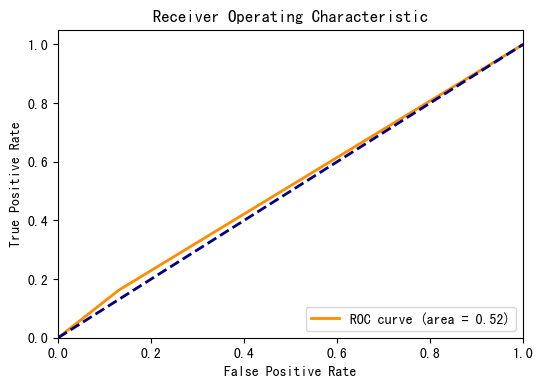

AUC: 0.5158636897767334
Desicion_tree分类指标为：
混淆矩阵为：
[[40  6]
 [31  6]]
准确率为：0.5542168674698795
f1_score为：0.24489795918367346
recall为：0.16216216216216217
specificity为：0.8695652173913043
roc_auc为：0.5158636897767334


In [51]:
DTR = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
run_regression_model(DTR,"Desicion_tree")

## 回归_集成算法

XGB分类指标为：


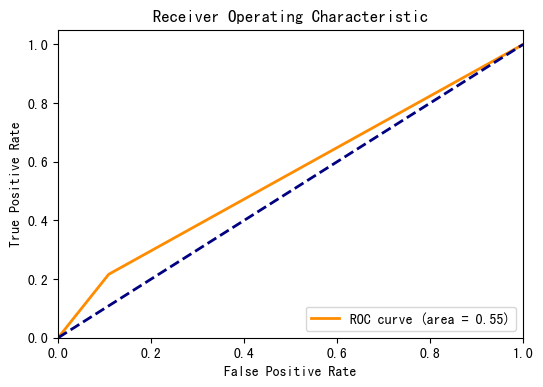

AUC: 0.5537602820211516
XGB分类指标为：
混淆矩阵为：
[[41  5]
 [29  8]]
准确率为：0.5903614457831325
f1_score为：0.32
recall为：0.21621621621621623
specificity为：0.8913043478260869
roc_auc为：0.5537602820211516


In [52]:
XGBR = XGBRFRegressor(n_estimators = 300, learning_rate = 1, max_depth = 10)
run_regression_model(XGBR,"XGB")

RF分类指标为：


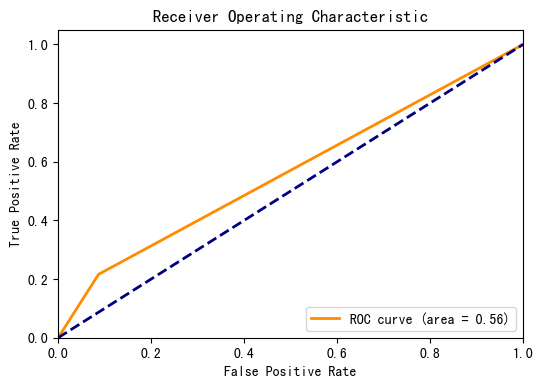

AUC: 0.5646298472385429
RF分类指标为：
混淆矩阵为：
[[42  4]
 [29  8]]
准确率为：0.6024096385542169
f1_score为：0.32653061224489793
recall为：0.21621621621621623
specificity为：0.9130434782608695
roc_auc为：0.5646298472385429


In [53]:
RFR = RandomForestRegressor(n_estimators = 500, max_depth = 12,random_state=1)
run_regression_model(RFR,"RF")

AdaBoost分类指标为：


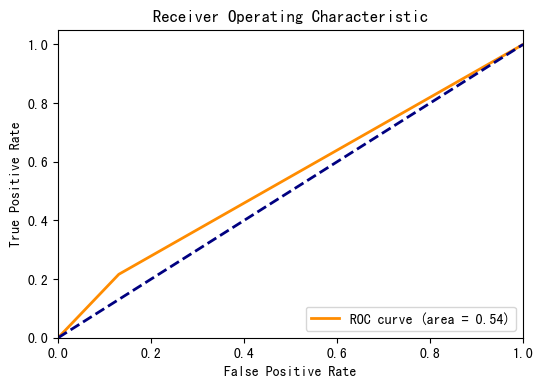

AUC: 0.5428907168037603
AdaBoost分类指标为：
混淆矩阵为：
[[40  6]
 [29  8]]
准确率为：0.5783132530120482
f1_score为：0.3137254901960784
recall为：0.21621621621621623
specificity为：0.8695652173913043
roc_auc为：0.5428907168037603


In [54]:
ADAR = AdaBoostRegressor(n_estimators = 100,random_state=1)
run_regression_model(ADAR,"AdaBoost")

In [55]:
'''train_data = lgb.Dataset(xr_train, label=yr_train)
test_data = lgb.Dataset(xr_test,label=yr_test, reference=train_data)
params = {
    'objective': "regression",  # 回归任务
    'metric': 'rmse',  # 使用对数损失作为评估指标
    'boosting_type': 'gbdt',  # GBDT boosting 类型
    'learning_rate': 0.1,  # 学习率
    'num_leaves': 40,  # 叶子节点数
    "n_estimators": 300,
    "max_depth": 10, 
    'verbose': -1  # 控制输出信息的详细程度
}
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)
y_pred = bst.predict(xr_test)
mse = mean_squared_error(yr_test, y_pred)
mape = mean_absolute_percentage_error(yr_test, y_pred)
r2 = r2_score(yr_test, y_pred)
regression_res.loc["mse","lgb"] = mse
regression_res.loc["mape","lgb"] = mape
regression_res.loc["r2score","lgb"] = r2
print(f"MSE为：{mse}")
print(f"MAPE为：{mape}")
print(f"r2_score为：{r2}")'''

'train_data = lgb.Dataset(xr_train, label=yr_train)\ntest_data = lgb.Dataset(xr_test,label=yr_test, reference=train_data)\nparams = {\n    \'objective\': "regression",  # 回归任务\n    \'metric\': \'rmse\',  # 使用对数损失作为评估指标\n    \'boosting_type\': \'gbdt\',  # GBDT boosting 类型\n    \'learning_rate\': 0.1,  # 学习率\n    \'num_leaves\': 40,  # 叶子节点数\n    "n_estimators": 300,\n    "max_depth": 10, \n    \'verbose\': -1  # 控制输出信息的详细程度\n}\nnum_round = 100\nbst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)\ny_pred = bst.predict(xr_test)\nmse = mean_squared_error(yr_test, y_pred)\nmape = mean_absolute_percentage_error(yr_test, y_pred)\nr2 = r2_score(yr_test, y_pred)\nregression_res.loc["mse","lgb"] = mse\nregression_res.loc["mape","lgb"] = mape\nregression_res.loc["r2score","lgb"] = r2\nprint(f"MSE为：{mse}")\nprint(f"MAPE为：{mape}")\nprint(f"r2_score为：{r2}")'

In [56]:
if 'acc' in regression_res.index :
    regression_res=regression_res.T
regression_res=regression_res.dropna()
regression_res_T=regression_res.T
print(regression_res)

plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2 * np.pi, len(regression_res.columns), endpoint=False).tolist()
angles += angles[:1]

for i, row in regression_res.iterrows():
    values = row.values.tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o',label=f'{i}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(regression_res.columns)

ax.yaxis.grid(True)

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1), framealpha=0.5)

plt.show()


plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2 * np.pi, len(regression_res_T.columns), endpoint=False).tolist()
angles += angles[:1]

for i, row in regression_res_T.iterrows():
    values = row.values.tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o',label=f'{i}')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(regression_res_T.columns)

ax.yaxis.grid(True)

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), framealpha=0.5)

plt.show()

                          acc   f1score    recall specificity   roc_auc
Linear_regression    0.542169  0.296296  0.216216  0.804348    0.510282
Lasso                0.554217  0.327273  0.243243  0.804348    0.523796
Ridge                0.542169  0.296296  0.216216  0.804348    0.510282
K_nearest_neighbors  0.60241   0.266667  0.162162  0.956522    0.559342
SVR                  0.542169  0.296296  0.216216  0.804348    0.510282
Desicion_tree        0.554217  0.244898  0.162162  0.869565    0.515864
XGB                  0.590361  0.32      0.216216  0.891304    0.55376 
RF                   0.60241   0.326531  0.216216  0.913043    0.56463 
AdaBoost             0.578313  0.313725  0.216216  0.869565    0.542891


<Figure size 600x400 with 0 Axes>

[Text(0.0, 0, 'acc'),
 Text(1.2566370614359172, 0, 'f1score'),
 Text(2.5132741228718345, 0, 'recall'),
 Text(3.7699111843077517, 0, 'specificity'),
 Text(5.026548245743669, 0, 'roc_auc')]

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

[Text(0.0, 0, 'Linear_regression'),
 Text(0.6981317007977318, 0, 'Lasso'),
 Text(1.3962634015954636, 0, 'Ridge'),
 Text(2.0943951023931953, 0, 'K_nearest_neighbors'),
 Text(2.792526803190927, 0, 'SVR'),
 Text(3.490658503988659, 0, 'Desicion_tree'),
 Text(4.1887902047863905, 0, 'XGB'),
 Text(4.886921905584122, 0, 'RF'),
 Text(5.585053606381854, 0, 'AdaBoost')]

<Figure size 600x400 with 0 Axes>

## 自动机器学习

In [57]:
'''from tpot import TPOTClassifier
from tpot import  TPOTRegressor'''

'from tpot import TPOTClassifier\nfrom tpot import  TPOTRegressor'

In [58]:
'''tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=1) 
tpot.fit(xc_train, yc_train)
print(tpot.score(xc_test, yc_test)) 
tpot.export('tpot_classifier_pipeline.py')'''

"tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=1) \ntpot.fit(xc_train, yc_train)\nprint(tpot.score(xc_test, yc_test)) \ntpot.export('tpot_classifier_pipeline.py')"

In [59]:
'''tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=1) 
tpot.fit(xr_train, yr_train)
print(tpot.score(xr_test, yr_test))
tpot.export('tpot_regression_pipeline.py')'''

"tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=1) \ntpot.fit(xr_train, yr_train)\nprint(tpot.score(xr_test, yr_test))\ntpot.export('tpot_regression_pipeline.py')"